In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('husl')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# color hex code
Blue = '#4285FA'
Red = '#EA4335'
Yellow = '#FBBC05'
Green = '#34A853'

In [3]:
loan = pd.read_csv('lending_club_loan_two.csv', parse_dates=['issue_d', 'earliest_cr_line'])
pd.set_option('display.max_columns', None)

In [140]:
loan.sample(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
189675,16000.0,60 months,18.54,411.01,E,E1,Assistant manager,6 years,OWN,48000.0,Source Verified,2014-12-01,Fully Paid,credit_card,26.17,2005-11-01,8.0,0.0,17697.0,70.5,17.0,w,INDIVIDUAL,0.0,0.0,"973 Medina Cliff Apt. 635\r\nJessicatown, MT 0..."
323556,18475.0,36 months,17.86,666.62,D,D5,Emergency medical tech,10+ years,MORTGAGE,44000.0,Verified,2015-10-01,Charged Off,credit_card,26.05,1997-08-01,13.0,0.0,16342.0,76.7,18.0,w,INDIVIDUAL,2.0,0.0,5800 Murphy Prairie Suite 121\r\nPort Jennifer...
317404,1400.0,36 months,15.80,49.09,C,C3,bluevalley healthcare,5 years,RENT,19000.0,Not Verified,2013-05-01,Charged Off,debt_consolidation,0.95,2005-07-01,2.0,1.0,331.0,33.1,7.0,f,INDIVIDUAL,0.0,0.0,"739 Scott Plains Suite 427\r\nWest Erin, KS 22690"
198831,18000.0,60 months,15.31,431.16,C,C4,medical assistant,6 years,MORTGAGE,40000.0,Source Verified,2014-04-01,Charged Off,debt_consolidation,6.87,2003-08-01,12.0,0.0,5031.0,23.5,20.0,f,INDIVIDUAL,1.0,0.0,"743 Kent Curve Apt. 561\r\nHannahstad, WY 11650"
329134,6500.0,36 months,9.17,207.22,B,B2,In store banker,2 years,RENT,31000.0,Not Verified,2015-11-01,Fully Paid,credit_card,18.66,2006-05-01,9.0,0.0,6317.0,83.1,18.0,w,INDIVIDUAL,0.0,0.0,"06278 Hernandez Mill\r\nWardberg, UT 05113"


In [5]:
metrics_num = loan.columns.difference(['loan_amnt', 'term', 'address'])

In [6]:
metrics_num

Index(['annual_inc', 'application_type', 'dti', 'earliest_cr_line',
       'emp_length', 'emp_title', 'grade', 'home_ownership',
       'initial_list_status', 'installment', 'int_rate', 'issue_d',
       'loan_status', 'mort_acc', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'title', 'total_acc', 'verification_status'],
      dtype='object')

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

In [8]:
#Check for duplicates
loan[loan.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


### 1. Dealing with missing data

In [9]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [10]:
import missingno as msno

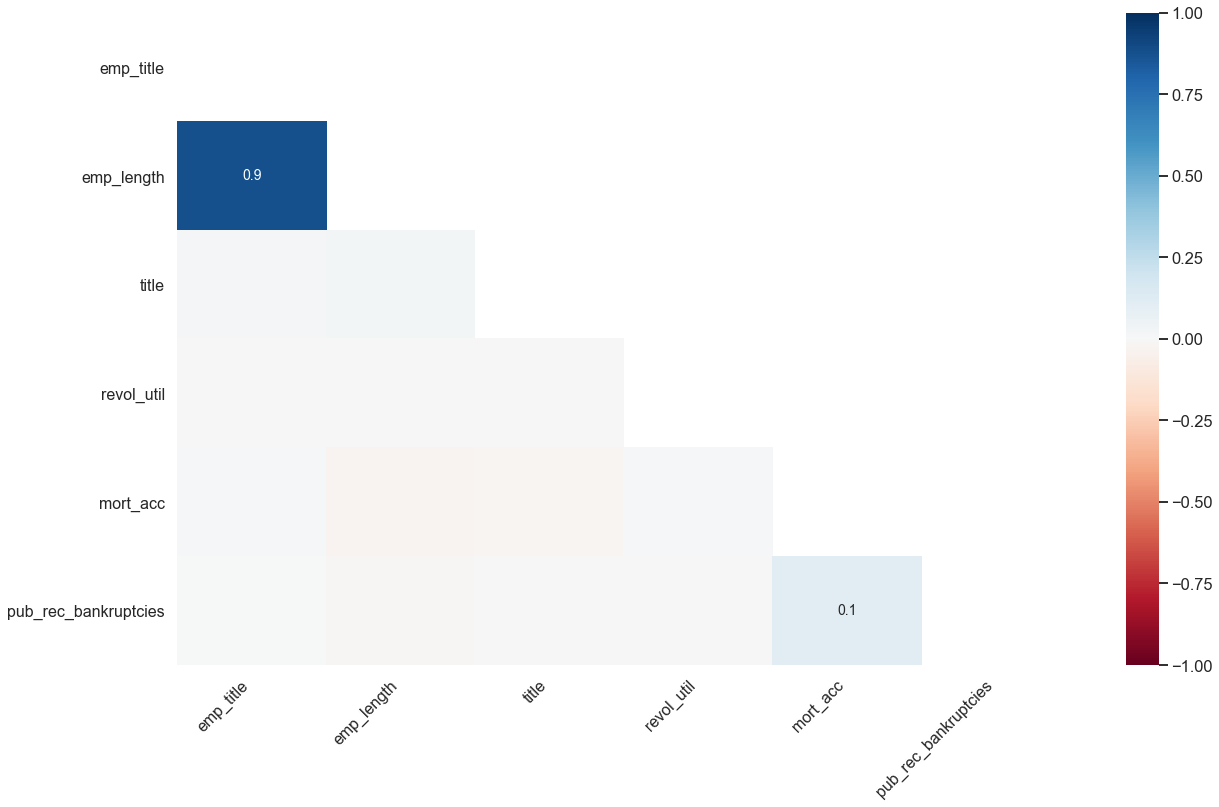

In [11]:
# Missing values features correlation
msno.heatmap(loan)

#### There is a high correlation between emp_length and emp_title. This is an indication that an observation will be most likely to have these 2 features missing together. This make sense because if you have Null,0 or Nan in emp_length(Employment Length, 0 meaning not employed ) then you wouldn't have an emp_title. (Employment Title)

In [12]:
#Checking emp_title & emp_length
loan[loan.emp_title.isnull()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
35,5375.0,36 months,13.11,181.39,B,B4,NaN,NaN,RENT,34000.0,Verified,2013-05-01,Fully Paid,credit_card,Pay Off Credit Card,26.12,1998-04-01,9.0,1.0,14998.0,88.7,20.0,f,INDIVIDUAL,5.0,1.0,"23617 Michael Viaduct\r\nWest John, MS 05113"
36,3250.0,36 months,16.78,115.52,C,C5,NaN,NaN,RENT,22500.0,Verified,2013-08-01,Charged Off,debt_consolidation,Cover,18.76,2009-06-01,7.0,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723"
40,35000.0,60 months,16.99,869.66,D,D1,NaN,4 years,MORTGAGE,130000.0,Verified,2014-02-01,Fully Paid,debt_consolidation,Debt consolidation,14.03,1992-08-01,10.0,0.0,34130.0,53.8,27.0,f,INDIVIDUAL,10.0,0.0,"8268 Reed Gardens Suite 996\r\nEast Johnmouth,..."
49,15000.0,36 months,7.89,469.29,A,A5,NaN,NaN,MORTGAGE,90000.0,Verified,2016-04-01,Fully Paid,debt_consolidation,Debt consolidation,11.75,1994-08-01,7.0,0.0,8205.0,93.2,18.0,w,INDIVIDUAL,6.0,0.0,"84009 David Stream\r\nSouth Nicolehaven, IL 05113"
58,10000.0,36 months,17.56,359.33,D,D1,NaN,NaN,MORTGAGE,32000.0,Verified,2013-07-01,Fully Paid,debt_consolidation,debt consolidation,9.83,2006-09-01,6.0,0.0,11615.0,82.4,7.0,w,INDIVIDUAL,0.0,0.0,"965 Spencer Courts\r\nPacetown, AZ 00813"


In [13]:
loan['emp_length'] = loan.emp_length.fillna(0)

In [14]:
loan['emp_title'] = loan.emp_title.fillna('NA')

In [15]:
loan[loan.title.isnull()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
555,8400.0,36 months,15.77,294.37,D,D1,Cocktail server,< 1 year,RENT,41000.0,Source Verified,2016-02-01,Fully Paid,debt_consolidation,NaN,12.59,2012-09-01,8.0,0.0,3117.0,43.3,10.0,w,INDIVIDUAL,0.0,0.0,"01091 Peter Dale\r\nNew Rebekah, MA 00813"
774,33000.0,36 months,9.80,1061.73,B,B3,Teacher,2 years,RENT,97000.0,Source Verified,2016-01-01,Fully Paid,debt_consolidation,NaN,13.90,2005-09-01,4.0,0.0,3149.0,31.5,55.0,w,INDIVIDUAL,0.0,0.0,"7584 Byrd Ways Apt. 909\r\nNorth Williamside, ..."
883,7200.0,36 months,6.49,220.65,A,A2,Owner,6 years,RENT,28000.0,Source Verified,2016-02-01,Fully Paid,credit_card,NaN,23.66,2003-04-01,12.0,1.0,12756.0,32.9,30.0,w,INDIVIDUAL,0.0,0.0,"60659 John Mission\r\nWest Karafurt, UT 48052"
1016,1000.0,36 months,15.31,34.82,C,C5,Agent,1 year,RENT,75000.0,Not Verified,2016-03-01,Fully Paid,other,NaN,8.91,2004-10-01,8.0,0.0,10765.0,94.0,11.0,w,INDIVIDUAL,0.0,0.0,"25038 Alex Drive Suite 788\r\nFlynntown, UT 05113"
1204,6000.0,36 months,11.47,197.78,B,B5,Machine Operator,8 years,RENT,60000.0,Verified,2016-03-01,Fully Paid,debt_consolidation,NaN,2.66,2001-10-01,6.0,0.0,7304.0,32.5,9.0,w,INDIVIDUAL,0.0,0.0,"582 Reed Trail\r\nEast Victoria, ND 29597"


In [16]:
print(f'Purpose variables:\n{loan.purpose.unique()}\n Number of Unique: {loan.purpose.nunique()}')

Purpose variables:
['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
 Number of Unique: 14


In [17]:
print(f'Title variables:\n{loan.title.unique()}\n Number of Unique: {loan.title.nunique()}')

Title variables:
['Vacation' 'Debt consolidation' 'Credit card refinancing' ...
 'Credit buster ' 'Loanforpayoff' 'Toxic Debt Payoff']
 Number of Unique: 48817


In [18]:
#Dropping title column because the purpose column holds similar meaning
loan.drop('title', axis=1, inplace=True)

In [19]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

Text(0.5, 0.98, 'Revolving Utilization Distribution')

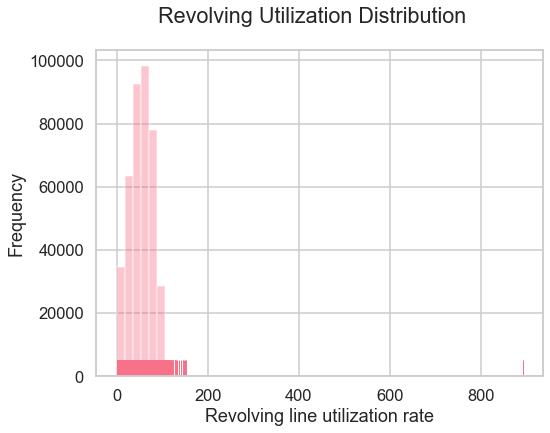

In [20]:
#Examine revol_util distribution
plt.figure(figsize=(8,6))
sns.distplot(loan.revol_util, rug=True, kde=False)
plt.xlabel('Revolving line utilization rate'); plt.ylabel('Frequency'); plt.suptitle('Revolving Utilization Distribution')

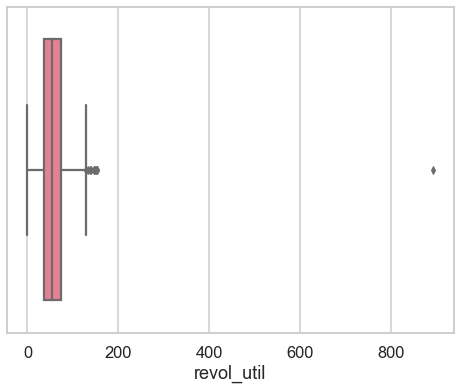

In [21]:
#Suspecting outliers
plt.figure(figsize=(8,6))
sns.boxplot(loan.revol_util)

In [22]:
 loan[loan.revol_util==892.3]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,Verified,2014-04-01,Fully Paid,debt_consolidation,14.67,1998-10-01,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


This data point is an outlier/error value. Because you can not have 892.3% revolving line utilization rate. This is way over the recommended 30% rate by LendingClub. Moreover, the revolving balance at 2677.0 on a $3500 loan amount. We do not know the credit limit of this observation but he/she has 2 open credit lines out of 9 total credit lines.

In [23]:
# Drop the error value
loan.drop(loan.index[137211], inplace=True)

In [24]:
loan = loan.reset_index(drop=True)

In [25]:
#Confirmation
loan.iloc[137211]

loan_amnt                                                           15000
term                                                            36 months
int_rate                                                             5.32
installment                                                        451.73
grade                                                                   A
sub_grade                                                              A1
emp_title                                           Technology Consultant
emp_length                                                        4 years
home_ownership                                                       RENT
annual_inc                                                          75000
verification_status                                       Source Verified
issue_d                                               2015-06-01 00:00:00
loan_status                                                    Fully Paid
purpose                               

Text(0.5, 0.98, 'Revolving Utilization Distribution')

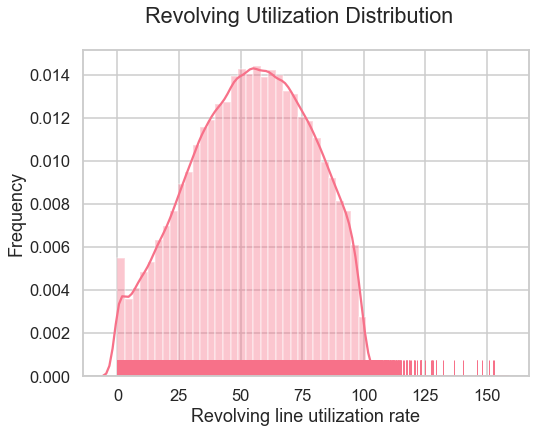

In [26]:
#Examine revol_util distribution after removed error value
plt.figure(figsize=(8,6))
sns.distplot(loan.revol_util, rug=True)
plt.xlabel('Revolving line utilization rate'); plt.ylabel('Frequency'); plt.suptitle('Revolving Utilization Distribution')

In [27]:
# fillna with 0 as NAN value could mean 0 revolving utilization rate 
loan['revol_util'] = loan.revol_util.fillna(0)

In [28]:
loan.mort_acc.unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [29]:
#Missing value in mortgage account could indicated the observation has no mortgage account
loan['mort_acc'] = loan.mort_acc.fillna(0)

In [30]:
loan.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    350379
1.0     42790
2.0      1847
NaN       535
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
#NAN values in public record bankruptcies can be 0 as no record.
loan['pub_rec_bankruptcies'] = loan.pub_rec_bankruptcies.fillna(0)

In [32]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### 2. EDA Numeric Features

In [33]:
loan.dtypes

loan_amnt                      float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
earliest_cr_line        datetime64[ns]
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
initial_list_status             object
application_type                object
mort_acc                       float64
pub_rec_bankruptcies           float64
address                  

In [34]:
# Number of unique variables in each object type columns
loan.select_dtypes('object').apply(pd.Series.nunique,axis=0)

term                        2
grade                       7
sub_grade                  35
emp_title              173106
emp_length                 12
home_ownership              6
verification_status         3
loan_status                 2
purpose                    14
initial_list_status         2
application_type            3
address                393699
dtype: int64

In [35]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396029.0,14113.914890,8357.434874,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396029.0,13.639403,4.472163,5.32,10.49,13.33,16.49,30.99
installment,396029.0,431.850493,250.727607,16.08,250.33,375.43,567.30,1533.81
annual_inc,396029.0,74203.249538,61637.681509,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396029.0,17.379520,18.019115,0.00,11.28,16.91,22.98,9999.00
open_acc,396029.0,11.311177,5.137634,0.00,8.00,10.00,14.00,90.00
pub_rec,396029.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396029.0,15844.573102,20591.851477,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,396029.0,53.752143,24.448603,0.00,35.80,54.80,72.90,153.00
total_acc,396029.0,25.414785,11.886977,2.00,17.00,24.00,32.00,151.00


Interest rate's max is 30.99 while annual income's max is 8,7065,82.00. This indicated we need to scale our data before our modelling process. Moreover, there are many extreme values which indicated outliers in our dataset.<br>
#### RED FLAGS

__annual_inc__: I highly doubt someone with annual income of 8 millions do need a loan from LendingClub.
__dti__: debts to income ratio's max has 9999.0?  <br>
__open_acc__: 90 open credit lines? Really ?<br>
__pub_rec__:  86 of derogatory public records? and you still get a loan approval?<br>
__revol_bal__: someone owning 1.743 million ? How could this happen? glitch?<br>
__total_acc__: This client need a medal for having 151 credit lines available to himself/herself<br>
__mort_acc__: Real estate King with 34 mortgage accounts<br>
__pub_rec_bankruptcies__: You won't get any loan from anywhere with any bankruptcies record<br>

In [36]:
#examine annual income
loan[loan.annual_inc ==8706582]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
308699,8000.0,36 months,13.66,272.11,C,C3,Correctional Sgt.,10+ years,MORTGAGE,8706582.0,Source Verified,2015-01-01,Charged Off,credit_card,0.11,2000-07-01,11.0,0.0,16449.0,54.1,18.0,w,INDIVIDUAL,1.0,0.0,"2410 Luna Station\r\nSouth Brandi, HI 93700"


A Correctional Sgt. earning 8.7millions annual.<br> The average Correctional Sergeant salary in the United States is $43,533 as of July 27, 2020, but the salary range typically falls between $38,756 and $48,309

In [37]:
#The rest of the date seems fine despite the ernomous income. We will impute the average income accordingly without 
#remove the data point|
loan.loc[loan.annual_inc ==8706582, 'annual_inc'] = 43533

In [38]:
#Confirmation
loan.iloc[308699:308700]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
308699,8000.0,36 months,13.66,272.11,C,C3,Correctional Sgt.,10+ years,MORTGAGE,43533.0,Source Verified,2015-01-01,Charged Off,credit_card,0.11,2000-07-01,11.0,0.0,16449.0,54.1,18.0,w,INDIVIDUAL,1.0,0.0,"2410 Luna Station\r\nSouth Brandi, HI 93700"


In [39]:
def find_upper_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper = loan[data > (Q3 + 1.5*IQR)]
    return(upper)

In [40]:
find_upper_outliers(loan.annual_inc)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
87,30000.0,60 months,24.70,875.28,G,G1,Medtronic,5 years,MORTGAGE,187321.0,Verified,2012-07-01,Fully Paid,debt_consolidation,21.03,2002-10-01,21.0,0.0,54810.0,93.4,52.0,f,INDIVIDUAL,3.0,0.0,"25281 Kevin Neck\r\nArmstrongton, TN 29597"
139,20000.0,36 months,10.37,648.83,B,B3,HP,< 1 year,MORTGAGE,170000.0,Verified,2011-01-01,Fully Paid,debt_consolidation,11.15,1990-06-01,8.0,0.0,140820.0,76.2,19.0,f,INDIVIDUAL,0.0,0.0,USCGC Miller\r\nFPO AE 22690
195,24000.0,60 months,24.50,697.42,F,F3,Lieutenant,10+ years,MORTGAGE,224000.0,Verified,2014-01-01,Charged Off,debt_consolidation,5.41,2001-08-01,15.0,0.0,5807.0,58.1,32.0,f,INDIVIDUAL,6.0,0.0,"PSC 8266, Box 8855\r\nAPO AP 11650"
221,25000.0,60 months,12.49,562.33,B,B5,Director Information Technology,10+ years,RENT,170000.0,Verified,2014-09-01,Fully Paid,major_purchase,1.41,1998-09-01,10.0,0.0,2390.0,5.4,13.0,f,INDIVIDUAL,0.0,0.0,"381 Garcia Hollow\r\nWest Oliviaport, AK 05113"
228,35000.0,36 months,12.99,1179.12,C,C2,Lawyer Partner,10+ years,MORTGAGE,350000.0,Verified,2016-02-01,Fully Paid,home_improvement,8.19,1992-09-01,10.0,0.0,216194.0,45.4,43.0,w,INDIVIDUAL,2.0,0.0,90980 Melissa Cliffs Suite 259\r\nPort Angelic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395878,24000.0,60 months,13.99,558.32,C,C4,Managing Princiap,4 years,MORTGAGE,180000.0,Verified,2015-02-01,Fully Paid,debt_consolidation,8.33,1999-01-01,13.0,2.0,12034.0,65.0,32.0,w,INDIVIDUAL,10.0,1.0,"5839 Anne Turnpike Apt. 643\r\nAbigailfurt, NM..."
395885,7000.0,36 months,7.90,219.04,A,A4,Development Dimensions International,10+ years,MORTGAGE,185000.0,Not Verified,2012-05-01,Fully Paid,debt_consolidation,18.51,1999-01-01,19.0,0.0,18317.0,30.3,39.0,f,INDIVIDUAL,5.0,0.0,76596 Hamilton Landing Apt. 334\r\nRachelburgh...
395891,35000.0,60 months,18.24,893.35,D,D5,District Sales Manager NY,10+ years,RENT,250000.0,Source Verified,2014-08-01,Fully Paid,debt_consolidation,7.00,1994-04-01,11.0,0.0,29424.0,35.8,18.0,f,INDIVIDUAL,0.0,0.0,"29312 Charles Mews\r\nCherylville, HI 22690"
395926,19600.0,36 months,11.99,650.91,B,B3,Leadman Miner,10+ years,MORTGAGE,186000.0,Source Verified,2014-03-01,Fully Paid,debt_consolidation,9.36,1999-07-01,11.0,0.0,13474.0,57.8,23.0,w,INDIVIDUAL,1.0,0.0,"944 Scott Harbors\r\nEast Steven, IN 00813"


In [41]:
loan.annual_inc.value_counts().sort_index()

0.0          1
600.0        1
2500.0       1
4000.0       2
4080.0       1
            ..
6500000.0    1
7000000.0    1
7141778.0    1
7446395.0    1
7600000.0    1
Name: annual_inc, Length: 27197, dtype: int64

Text(0.5, 1.0, 'Annual Income vs Loan Status')

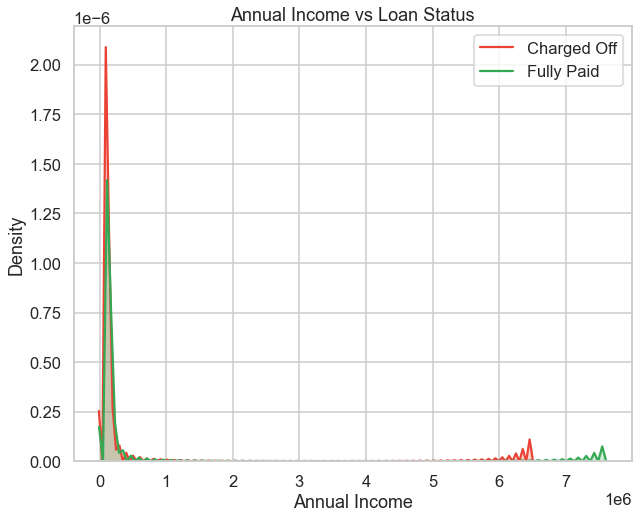

In [42]:
fig, ax = plt.subplots(figsize=(10,8))

sns.kdeplot(loan[loan.loan_status == 'Charged Off']['annual_inc'], shade=True, color=Red, label='Charged Off')
sns.kdeplot(loan[loan.loan_status == 'Fully Paid']['annual_inc'], shade=True, color=Green, label='Fully Paid')
ax.set_xlabel('Annual Income'); ax.set_ylabel('Density'); ax.set_title('Annual Income vs Loan Status')

Upon close examine, we can assume that the application process does not verify the Annual Income input of applicant. There are 20 observations with over 2 million annual income. Thus, we will remove these data to minimise outliers. Annual Income is an important factor in predicting default borrower. 

In [43]:
an_out = loan.annual_inc >=2000000
loan = loan[~an_out]

In [44]:
loan.reset_index(drop=True, inplace=True)

In [45]:
#Examine open_acc
loan.groupby('grade')['open_acc'].median()

grade
A    11.0
B    10.0
C    10.0
D    10.0
E    11.0
F    11.0
G    11.0
Name: open_acc, dtype: float64

In [46]:
#Data point seem fine
loan[loan.open_acc ==90]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
107914,30000.0,60 months,12.39,673.27,C,C1,Senior Underwriter,3 years,MORTGAGE,115000.0,Verified,2015-01-01,Fully Paid,debt_consolidation,31.99,1982-04-01,90.0,0.0,128940.0,1.9,107.0,w,INDIVIDUAL,2.0,0.0,947 Matthew Meadow Suite 039\r\nNorth Joshuala...


Text(0.5, 1.0, 'Open Credit Lines vs Loan Status')

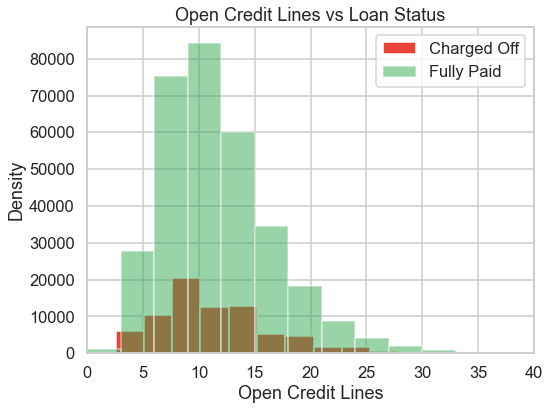

In [47]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(loan[loan.loan_status == 'Charged Off']['open_acc'],bins=30, alpha=1, color=Red, label='Charged Off')
ax.hist(loan[loan.loan_status == 'Fully Paid']['open_acc'],bins=30, alpha=0.5, color=Green, label='Fully Paid')
plt.xlim([0, 40])
plt.legend()
ax.set_xlabel('Open Credit Lines'); ax.set_ylabel('Density'); ax.set_title('Open Credit Lines vs Loan Status')

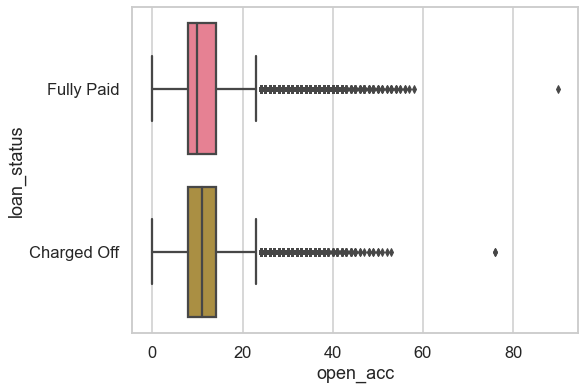

In [48]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='open_acc', y='loan_status', data=loan)

In [49]:
# Examine pub_rec
loan[loan.pub_rec == 86]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
218808,6400.0,36 months,13.18,216.2,C,C3,Teacher,1 year,MORTGAGE,38000.0,Verified,2015-11-01,Charged Off,debt_consolidation,32.41,1987-12-01,13.0,86.0,7788.0,78.7,19.0,f,INDIVIDUAL,0.0,1.0,"32188 Teresa Ridges\r\nEast Kristishire, RI 30723"


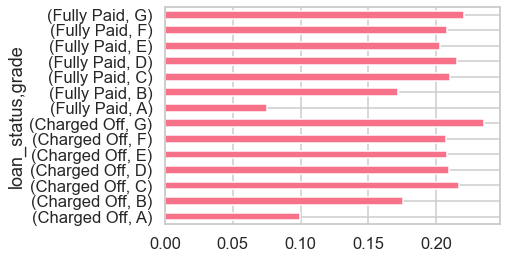

In [50]:
loan.groupby(['loan_status','grade'])['pub_rec'].mean().plot.barh()

In [51]:
counts_df = loan.groupby(['grade', 'loan_status'])['address'].count().unstack()
counts_df.T

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,4036,14586,22449,18338,11765,5037,1461
Fully Paid,60145,101425,83531,45186,19723,6734,1593


In [52]:
grade_per = counts_df.T.div(counts_df.T.sum()).T
grade_per

loan_status,Charged Off,Fully Paid
grade,,
A,0.062885,0.937115
B,0.125729,0.874271
C,0.211823,0.788177
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427916,0.572084
G,0.478389,0.521611


Text(0.5, 0.98, 'Proportion of Default by Grade')

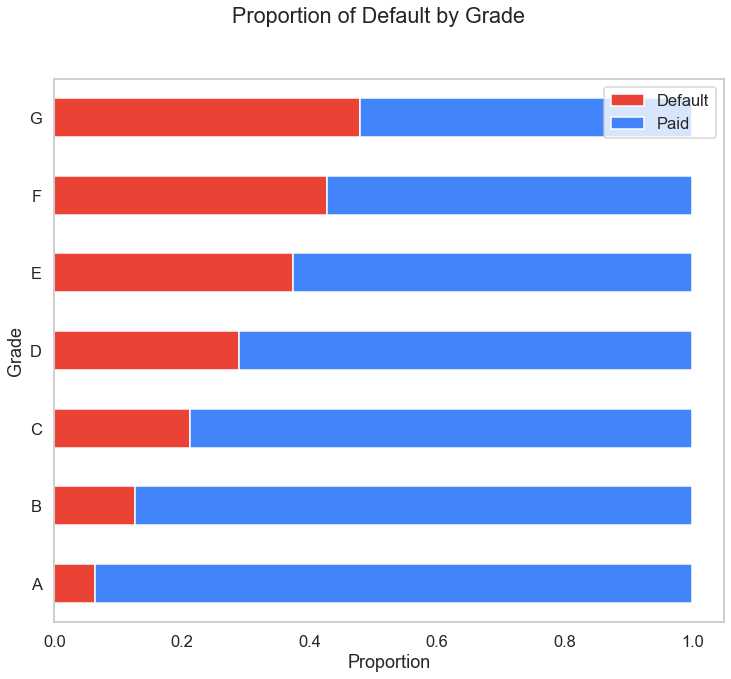

In [53]:
fig, ax = plt.subplots(figsize=(12,10))
sns.set_style('white')
grade_per.plot(kind='barh', stacked=True, color=[Red, Blue], ax=ax)

ax.set_xlabel('Proportion')
ax.set_ylabel('Grade')


color_patches = [Patch(facecolor=Red, label='Default'), Patch(facecolor=Blue, label='Paid')]
ax.legend(handles=color_patches)

fig.suptitle('Proportion of Default by Grade')

In [54]:
loan.pub_rec.value_counts()

0.0     338252
1.0      49738
2.0       5476
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

In [55]:
#Data seems to be fine. However, there seem to be a trend, higher public record will results higher chances of default

In [56]:
loan[loan.revol_bal==1743266]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
118577,35000.0,36 months,11.14,1148.18,B,B2,plastic surgery,10+ years,MORTGAGE,400000.0,Verified,2013-01-01,Fully Paid,debt_consolidation,33.48,1984-07-01,28.0,0.0,1743266.0,29.5,59.0,f,INDIVIDUAL,6.0,0.0,81070 Meredith Fort Apt. 334\r\nNew Stephaniev...


In [57]:
loan.groupby('grade')['revol_bal'].median()

grade
A    11480.0
B    11247.0
C    10942.0
D    10727.5
E    11883.5
F    11942.0
G    11624.5
Name: revol_bal, dtype: float64

In [58]:
loan.revol_bal.value_counts().sort_index()

0.0          2128
1.0            30
2.0            26
3.0            28
4.0            20
             ... 
1023940.0       1
1030826.0       1
1190046.0       1
1298783.0       1
1743266.0       1
Name: revol_bal, Length: 55619, dtype: int64

In [59]:
# Data seems legit
loan[loan.revol_bal > 1000000]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
53561,31500.0,36 months,14.16,1079.05,C,C2,President,10+ years,MORTGAGE,275000.0,Verified,2014-05-01,Fully Paid,debt_consolidation,9.84,1992-10-01,10.0,1.0,1190046.0,49.6,16.0,w,INDIVIDUAL,4.0,0.0,"08790 Mary Lodge\r\nPort Clintonfort, MN 22690"
118577,35000.0,36 months,11.14,1148.18,B,B2,plastic surgery,10+ years,MORTGAGE,400000.0,Verified,2013-01-01,Fully Paid,debt_consolidation,33.48,1984-07-01,28.0,0.0,1743266.0,29.5,59.0,f,INDIVIDUAL,6.0,0.0,81070 Meredith Fort Apt. 334\r\nNew Stephaniev...
119445,35000.0,36 months,21.48,1327.27,E,E2,NA,10+ years,OWN,920000.0,Verified,2014-01-01,Charged Off,small_business,8.65,1987-12-01,9.0,1.0,1030826.0,45.3,18.0,f,INDIVIDUAL,3.0,0.0,"504 Cole Prairie Apt. 554\r\nNorth Matthew, PA..."
244145,35000.0,60 months,11.44,768.69,B,B4,Cfo,< 1 year,OWN,900000.0,Source Verified,2014-12-01,Fully Paid,credit_card,9.76,1990-09-01,12.0,0.0,1298783.0,72.3,32.0,w,INDIVIDUAL,1.0,0.0,"069 Michael Extension\r\nZacharytown, AR 05113"
255297,35000.0,36 months,7.91,1095.33,A,A5,Attorney,10+ years,MORTGAGE,350000.0,Not Verified,2016-01-01,Fully Paid,credit_card,26.04,1979-10-01,15.0,0.0,1023940.0,96.0,24.0,w,INDIVIDUAL,6.0,0.0,"37750 Carey Prairie Apt. 766\r\nNew Codyport, ..."


In [60]:
loan[loan.total_acc == 151]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
105678,35000.0,36 months,13.99,1196.05,C,C4,Sr Operator,3 years,RENT,160000.0,Verified,2015-10-01,Charged Off,debt_consolidation,12.65,2002-06-01,26.0,0.0,46643.0,71.5,151.0,w,INDIVIDUAL,0.0,0.0,"37001 Park Station\r\nDonnaport, SD 86630"


(0.0, 80.0)

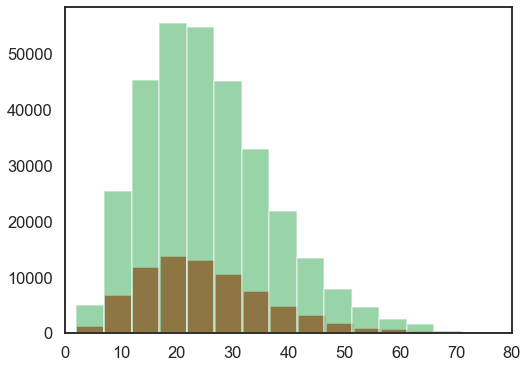

In [61]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(loan[loan.loan_status == 'Charged Off']['total_acc'],bins=30, alpha=1, color=Red, label='Charged Off')
ax.hist(loan[loan.loan_status == 'Fully Paid']['total_acc'],bins=30, alpha=0.5, color=Green, label='Fully Paid')
plt.xlim([0, 80])

In [62]:
loan[loan.mort_acc == 34]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
10207,25000.0,60 months,12.39,561.06,C,C1,owner,< 1 year,MORTGAGE,252000.0,Source Verified,2015-01-01,Fully Paid,credit_card,9.86,1994-12-01,23.0,0.0,66441.0,55.1,61.0,w,INDIVIDUAL,34.0,0.0,"21770 Reyes Mountains\r\nEast Chelsea, VA 22690"


(0.0, 20.0)

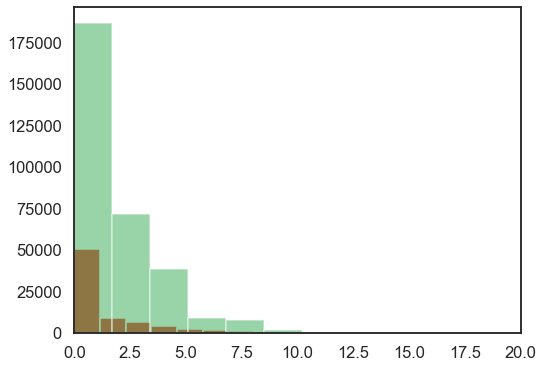

In [63]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(loan[loan.loan_status == 'Charged Off']['mort_acc'],bins=20, alpha=1, color=Red, label='Charged Off')
ax.hist(loan[loan.loan_status == 'Fully Paid']['mort_acc'],bins=20, alpha=0.5, color=Green, label='Fully Paid')
plt.xlim([0, 20])

In [64]:
loan.pub_rec_bankruptcies.value_counts()

0.0    350895
1.0     42789
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [65]:
loan[loan.pub_rec_bankruptcies==8]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
226069,25000.0,36 months,16.29,882.51,D,D1,Territory Sales Manager,1 year,RENT,115000.0,Source Verified,2016-03-01,Charged Off,debt_consolidation,19.73,2003-07-01,5.0,8.0,47459.0,97.9,10.0,w,INDIVIDUAL,0.0,8.0,"186 Kirk Glen\r\nLake Brandonport, WI 70466"
373953,6500.0,36 months,24.08,255.29,F,F2,Corp. Security,7 years,RENT,45000.0,Verified,2013-11-01,Fully Paid,other,12.43,1997-07-01,7.0,9.0,1600.0,21.3,27.0,f,INDIVIDUAL,0.0,8.0,"3120 King Route Apt. 966\r\nLake Walter, MS 05113"


In [66]:
# Save Loan for further analysis
df = loan.copy()

In [67]:
loan_num = [col for col in loan.columns if loan[col].dtypes != 'O']

In [68]:
loan_num.remove('issue_d')
loan_num.remove('earliest_cr_line')

In [69]:
loan_num

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

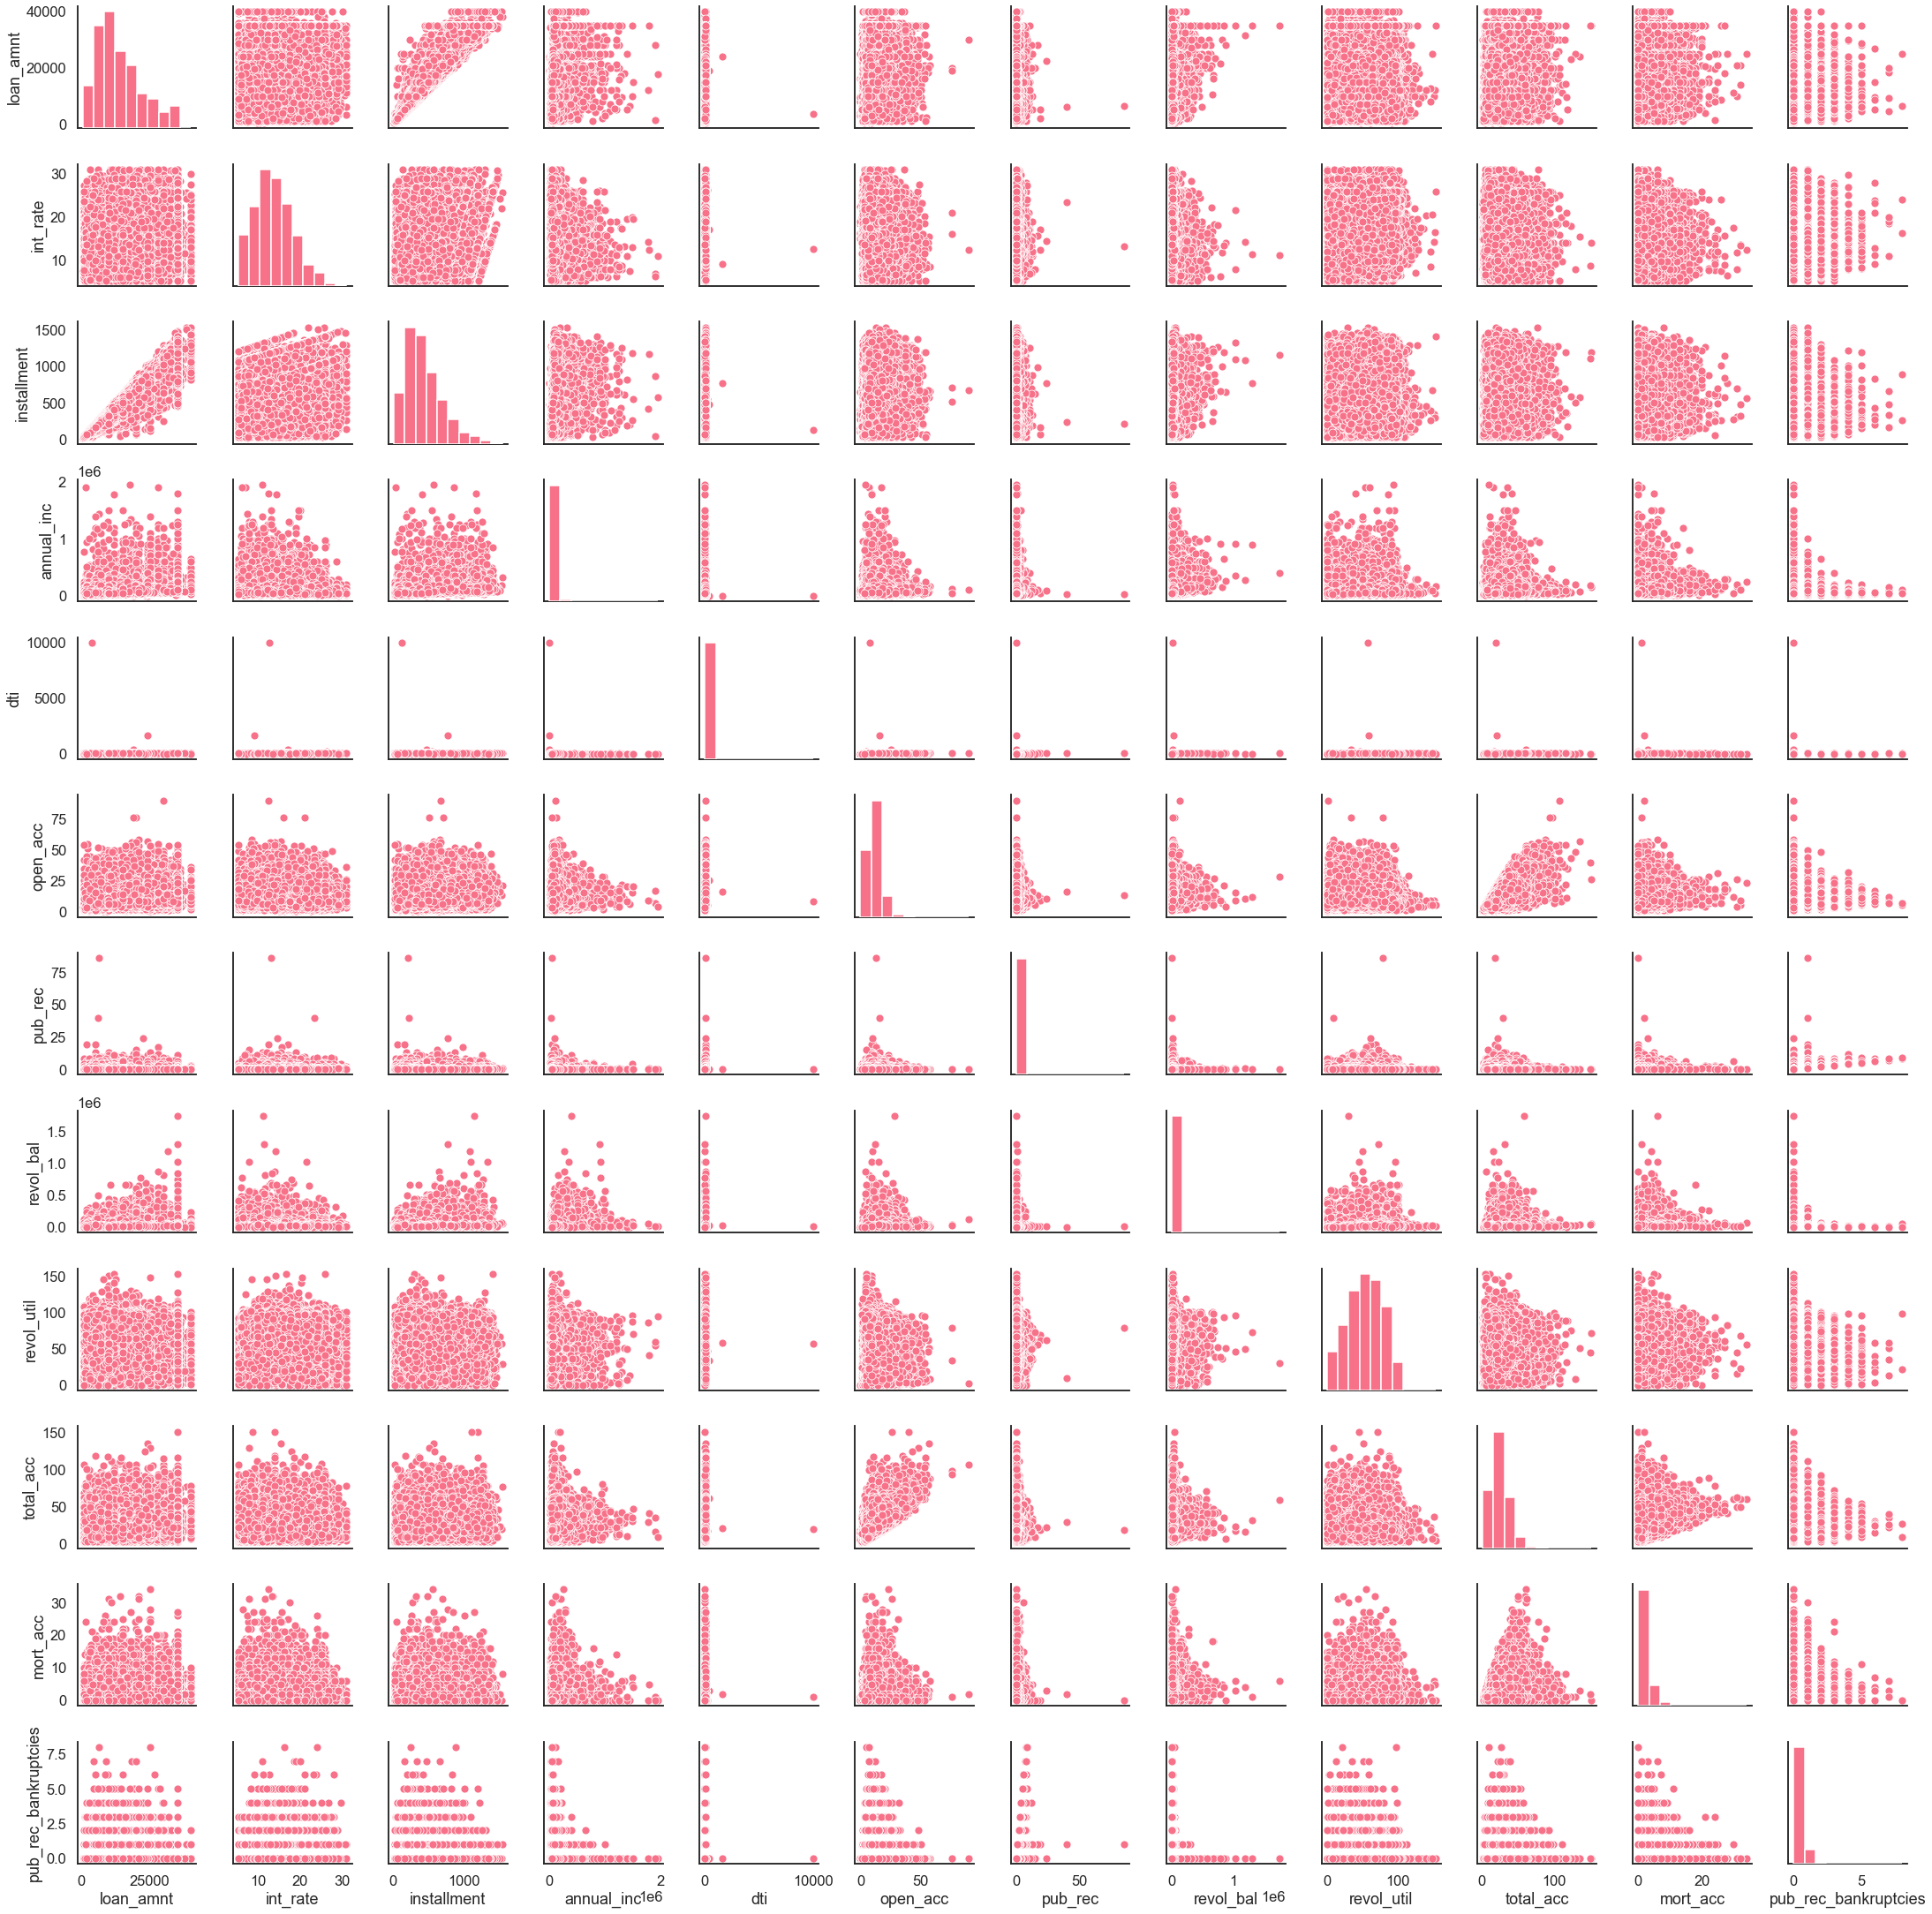

In [70]:
sns.pairplot(loan[loan_num])

In [71]:
melt = loan.melt(id_vars=['loan_status'], value_vars=loan_num)

In [72]:
melt

,loan_status,variable,value
0,Fully Paid,loan_amnt,10000.0
1,Fully Paid,loan_amnt,8000.0
2,Fully Paid,loan_amnt,15600.0
3,Fully Paid,loan_amnt,7200.0
4,Charged Off,loan_amnt,24375.0
...,...,...,...
4752103,Fully Paid,pub_rec_bankruptcies,0.0
4752104,Fully Paid,pub_rec_bankruptcies,0.0
4752105,Fully Paid,pub_rec_bankruptcies,0.0
4752106,Fully Paid,pub_rec_bankruptcies,0.0


## Distribution on numeric

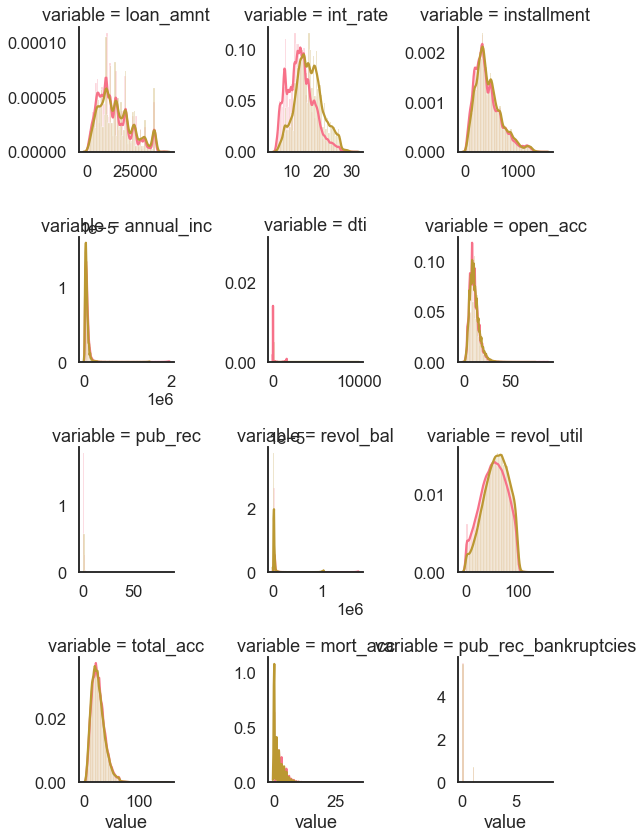

In [73]:
g = sns.FacetGrid(data=melt, col = "variable", hue='loan_status', sharey=False, sharex=False, col_wrap=3)
g.map(sns.distplot, 'value' )

## Violinplot on numeric

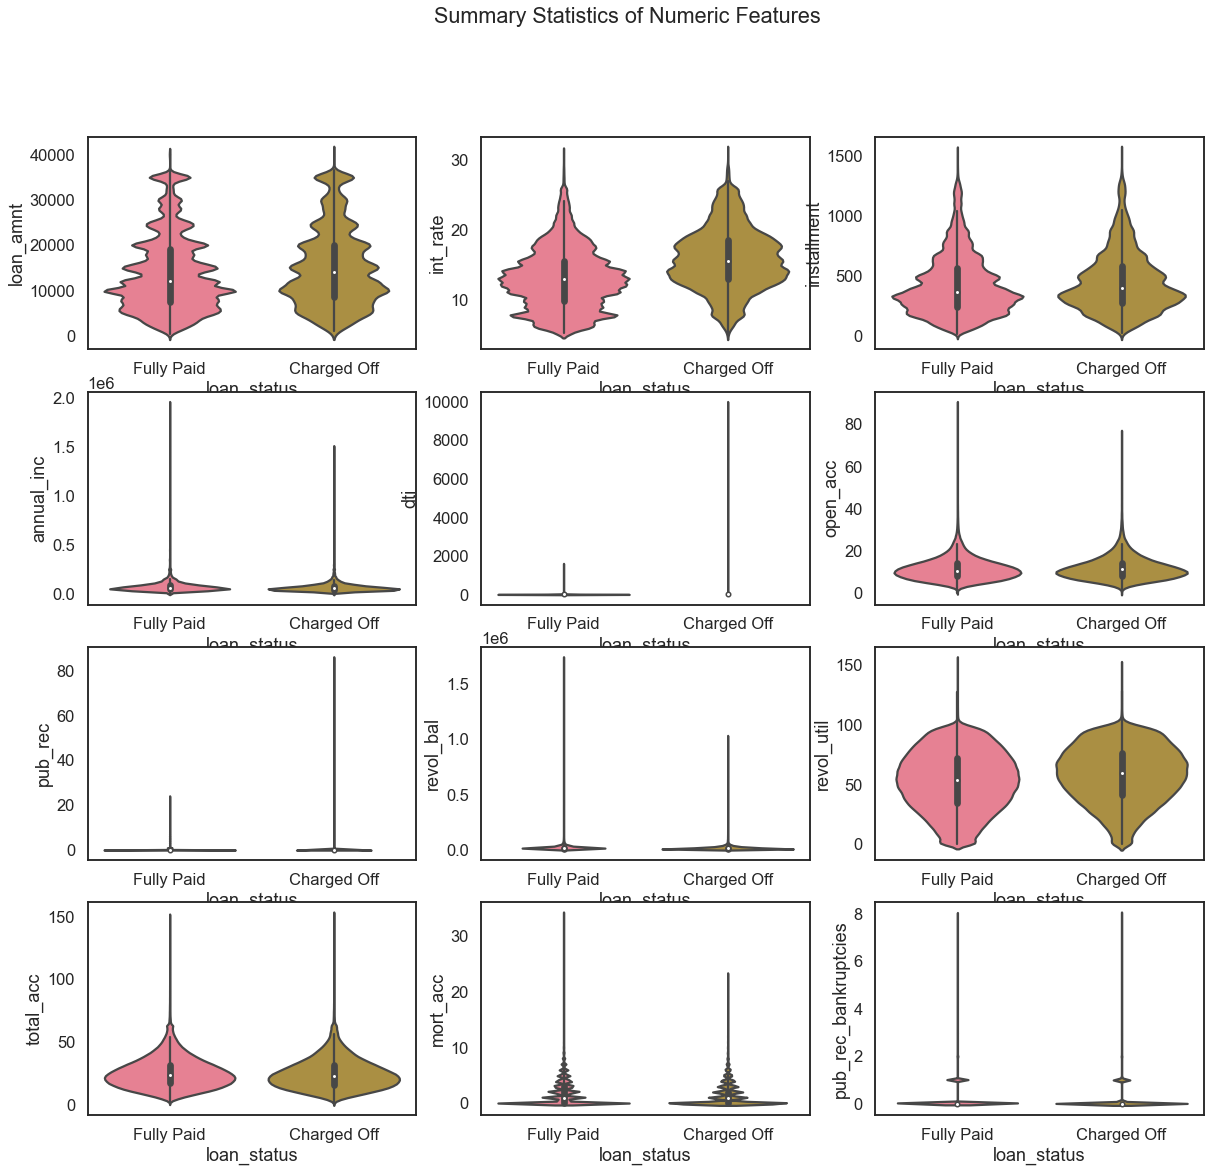

In [74]:
plt.figure(figsize=(20,18))
for i, c in enumerate(loan_num):
    plt.subplot(4,3, i+1)
    sns.violinplot(x='loan_status', y=c, data=loan)

plt.suptitle('Summary Statistics of Numeric Features')    
plt.show()

### Default by TimeSeries

In [75]:
loan1 = loan.copy()
loan1['loan_status']= loan1.loan_status.map({'Fully Paid': 0, 'Charged Off': 1})
line = loan1.resample('M', on='issue_d').agg({'loan_status':'sum'}).reset_index()

In [76]:
#loan2 = loan.copy()
#loan2['loan_status']= loan2.loan_status.map({'Fully Paid': 1, 'Charged Off': 0})
#line2 = loan2.resample('M', on='issue_d').agg({'loan_status':'sum'}).reset_index()

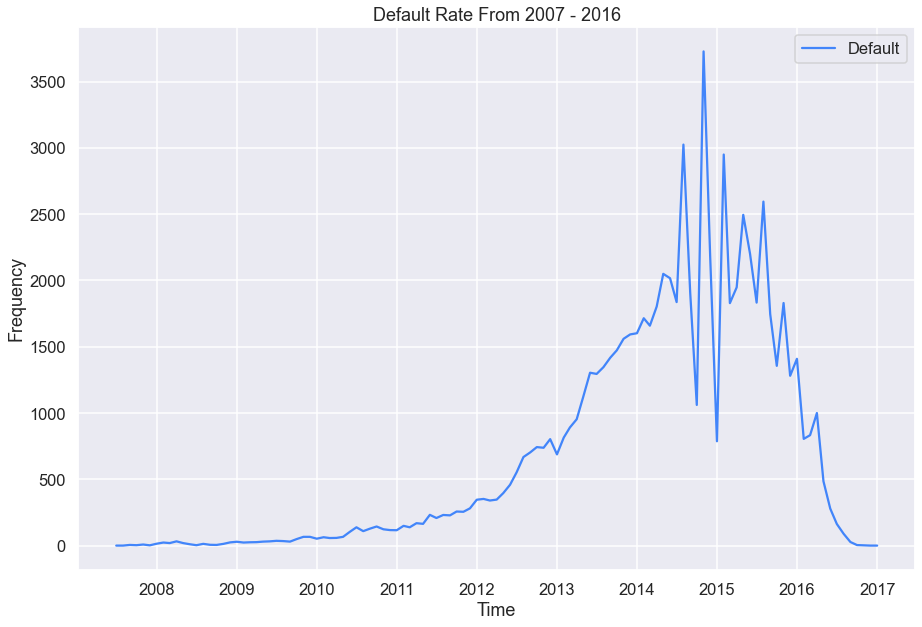

In [77]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(line.issue_d, line.loan_status, color=Blue, label='Default')

ax.set_xlabel('Time'); ax.set_ylabel('Frequency'); ax.set_title('Default Rate From 2007 - 2016')
plt.savefig('time')

### Examine DTI

In [78]:
loan.groupby('grade')['dti'].median()

grade
A    14.210
B    16.250
C    17.560
D    18.410
E    19.200
F    19.160
G    19.175
Name: dti, dtype: float64

In [79]:
loan.loc[loan.dti==9999, 'dti'] = 17.56

In [80]:
loan.loc[loan.dti==1622, 'dti'] = 16.25

In [81]:
loan.loc[loan.dti==380.53, 'dti'] = 18.41

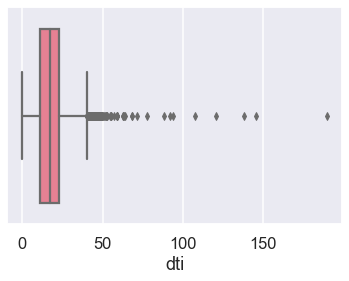

In [82]:
sns.boxplot(loan.dti)

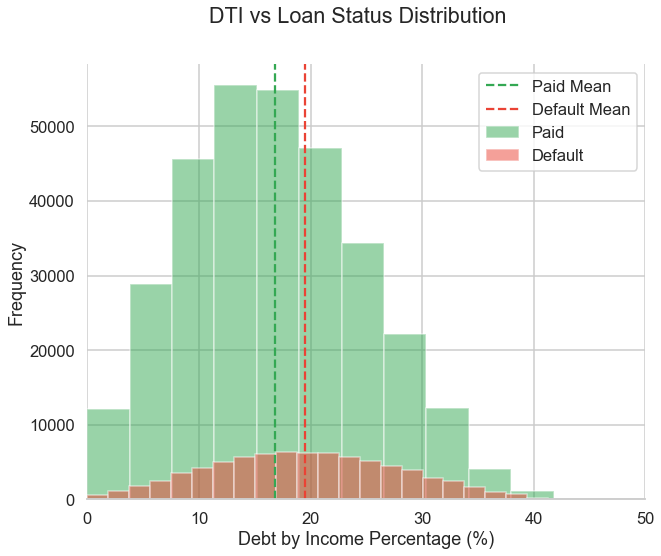

In [83]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(loan[loan.loan_status=='Fully Paid']['dti'], bins=50, alpha=0.5, color=Green, label='Paid')
ax.axvline(loan[loan.loan_status=='Fully Paid']['dti'].mean(), color=Green, linestyle='--', label='Paid Mean')
ax.hist(loan[loan.loan_status=='Charged Off']['dti'], bins=50, alpha=0.5, color=Red, label='Default')
ax.axvline(loan[loan.loan_status=='Charged Off']['dti'].mean(), color=Red, linestyle='--', label='Default Mean')

ax.set_xlim([0, 50])
ax.set_xlabel('Debt by Income Percentage (%)')
ax.set_ylabel('Frequency')
fig.suptitle('DTI vs Loan Status Distribution')
sns.despine(left=True)
ax.legend()
plt.savefig('dti')

### Examine Revolving Balance

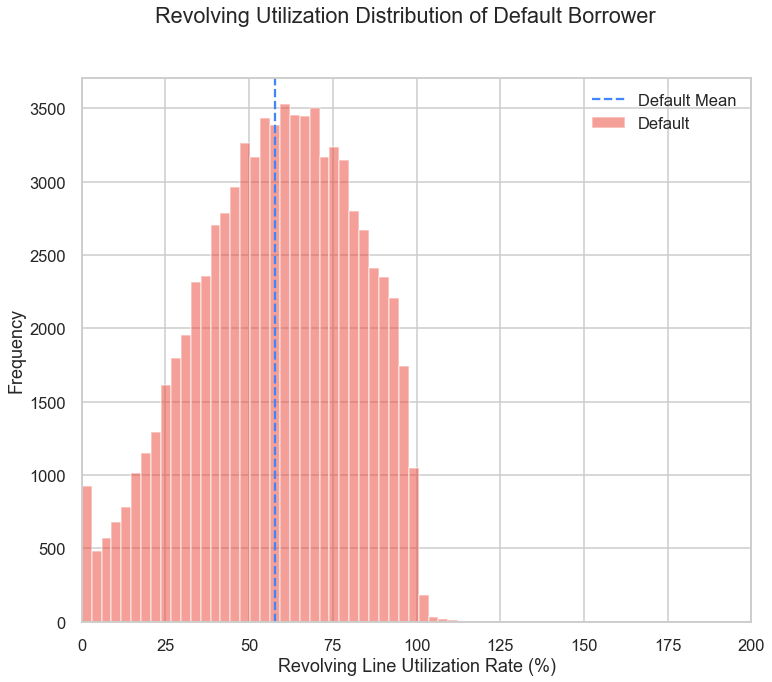

In [179]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12,10))

ax.hist(loan[loan.loan_status=='Charged Off']['revol_util'], bins=50, alpha=0.5, color=Red, label='Default')
ax.axvline(loan[loan.loan_status=='Charged Off']['revol_util'].mean(), color=Blue, linestyle='--', label='Default Mean')
ax.set_xlim([0, 200])
ax.legend()
ax.set_xlabel('Revolving Line Utilization Rate (%)')
ax.set_ylabel('Frequency')
fig.suptitle('Revolving Utilization Distribution of Default Borrower')

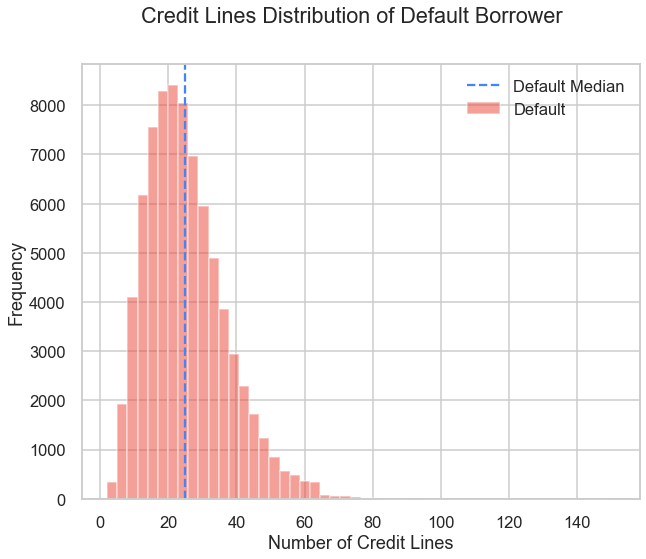

In [177]:
sns.set_context('talk')
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(loan[loan.loan_status=='Charged Off']['total_acc'], bins=50, alpha=0.5, color=Red, label='Default')
ax.axvline(loan[loan.loan_status=='Charged Off']['total_acc'].mean(), color=Blue, linestyle='--', label='Default Median')

ax.legend()
ax.set_xlabel('Number of Credit Lines')
ax.set_ylabel('Frequency')
fig.suptitle('Credit Lines Distribution of Default Borrower')

In [182]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [185]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

Text(0.5, 0.98, 'Revolving Utilization vs Number of Credit Lines')

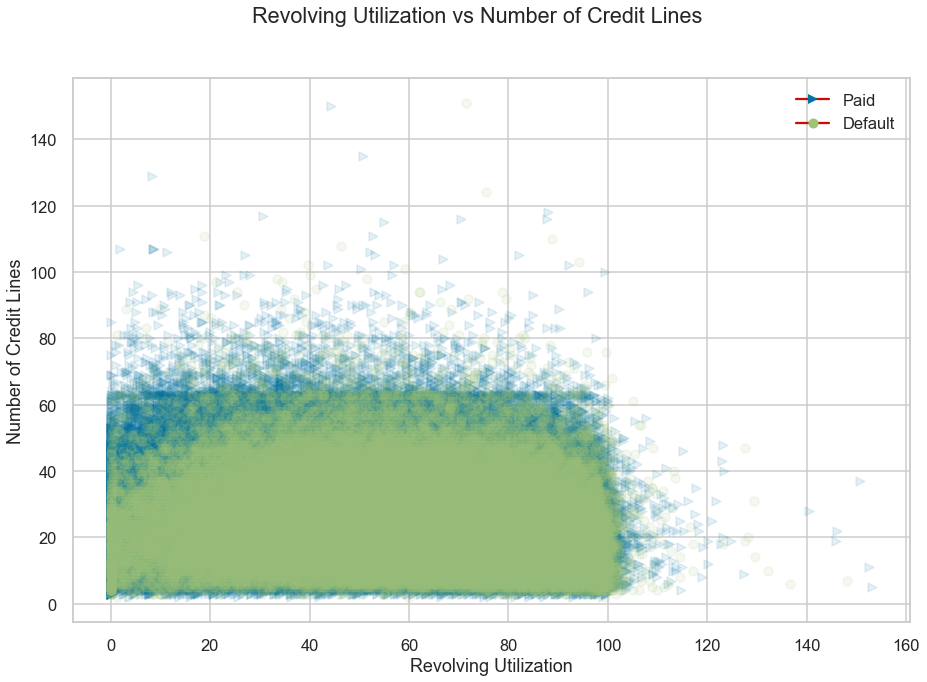

In [188]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(loan[loan.loan_status=='Fully Paid']['revol_util'], loan[loan.loan_status=='Fully Paid']['total_acc'], c='b', marker='>', alpha=0.1)
ax.scatter(loan[loan.loan_status =='Charged Off']['revol_util'], loan[loan.loan_status =='Charged Off']['total_acc'], c='g', marker='o', alpha=0.1)

ax.set_xlabel('Revolving Utilization'), ax.set_ylabel('Number of Credit Lines')

color_patches=[Line2D([0],[0], marker='>', color='r', label='Paid', markerfacecolor='b', markersize=10),
               Line2D([0],[0], marker='o', color='r', label='Default', markerfacecolor='g', markersize=10)]
ax.legend(handles=color_patches)

fig.suptitle('Revolving Utilization vs Number of Credit Lines')

Text(0.5, 0.98, 'Revolving Utilization vs Number of Credit Lines')

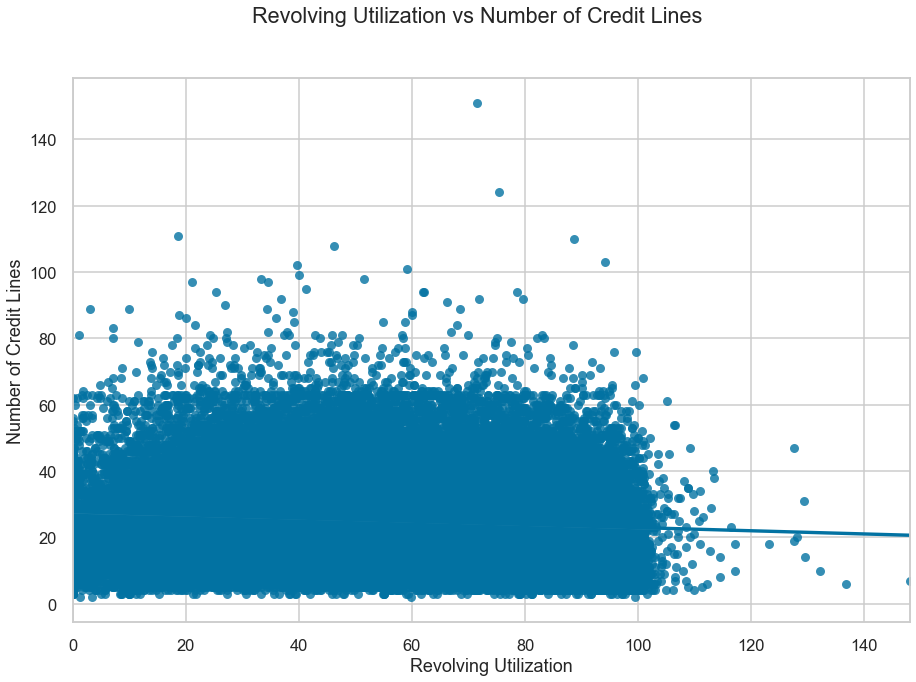

In [192]:
fig, ax = plt.subplots(figsize=(15,10))

sns.regplot(loan[loan.loan_status =='Charged Off']['revol_util'], loan[loan.loan_status =='Charged Off']['total_acc'], marker='o')

ax.set_xlabel('Revolving Utilization'), ax.set_ylabel('Number of Credit Lines')

fig.suptitle('Revolving Utilization vs Number of Credit Lines')

In [86]:
end auto run

SyntaxError: invalid syntax (<ipython-input-86-094773052939>, line 1)

Overall, there are many extreme values in our dataset. We can not classify them as outliers because we do not have the domain knowledge nor an expertise for clarification. We also can not drop these values as we are dealing with imbalance data. Hence, we do not want to reduce the minority class 

In [87]:
df = loan.copy()

### 3. EDA Categorical Features

In [88]:
df.select_dtypes("object").apply(pd.Series.nunique, axis=0)

term                        2
grade                       7
sub_grade                  35
emp_title              173096
emp_length                 12
home_ownership              6
verification_status         3
loan_status                 2
purpose                    14
initial_list_status         2
application_type            3
address                393679
dtype: int64

In [89]:
df.term.value_counts()

 36 months    301987
 60 months     94022
Name: term, dtype: int64

In [90]:
df['term'] = df.term.str.strip('months')

In [91]:
df['term'] = pd.get_dummies(df.term)

In [92]:
#Turn 36 months va 60 months into binary of 1s and 0s 
df.term.value_counts()

1    301987
0     94022
Name: term, dtype: int64

In [93]:
df.rename(columns={'term': 'term_is_36m'}, inplace=True)

In [94]:
df.drop('sub_grade', axis=1, inplace=True) # We have grade column which is similar

In [95]:
df.emp_title

0                        Marketing
1                  Credit analyst 
2                     Statistician
3                  Client Advocate
4          Destiny Management Inc.
                    ...           
396004            licensed bankere
396005                       Agent
396006                City Carrier
396007        Gracon Services, Inc
396008    Internal Revenue Service
Name: emp_title, Length: 396009, dtype: object

In [96]:
df.drop('emp_title', axis=1, inplace=True)

In [97]:
df['emp_length'] = df.emp_length.str.strip('years').str.strip(' < ').str.strip(' + ')

In [98]:
df.emp_length.unique()

array(['10', '4', '1', '6', '9', '2', '3', '8', '7', '5', nan],
      dtype=object)

In [99]:
df.emp_length.fillna(0, inplace=True)

In [100]:
df.select_dtypes("object").apply(pd.Series.nunique, axis=0)

grade                       7
emp_length                 11
home_ownership              6
verification_status         3
loan_status                 2
purpose                    14
initial_list_status         2
application_type            3
address                393679
dtype: int64

In [101]:
df['emp_length'] = df.emp_length.astype('int') # ordinal category

In [102]:
df.select_dtypes("object").apply(pd.Series.nunique, axis=0)

grade                       7
home_ownership              6
verification_status         3
loan_status                 2
purpose                    14
initial_list_status         2
application_type            3
address                393679
dtype: int64

In [103]:
df.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [104]:
df['initial_list_status'] = pd.get_dummies(df.initial_list_status)

In [105]:
df.rename(columns={'initial_list_status': 'list_status_w'}, inplace=True)

In [106]:
df.drop('address',axis=1, inplace=True)

In [107]:
df.loc[df.loan_status=='Charged Off', 'loan_status'] = 1 #Class of interest
df.loc[df.loan_status=='Fully Paid', 'loan_status'] = 0

In [108]:
df['loan_status'] = df.loan_status.astype('int')

In [109]:
df.rename(columns={'loan_status': 'is_default'}, inplace=True)

In [110]:
df.select_dtypes("object").apply(pd.Series.nunique, axis=0)

grade                   7
home_ownership          6
verification_status     3
purpose                14
application_type        3
dtype: int64

In [111]:
df.shape

(396009, 23)

In [112]:
from category_encoders import TargetEncoder

In [113]:
encoder = TargetEncoder()
df['verification_encoder'] = encoder.fit_transform(df.verification_status, df.is_default)

In [114]:
encoder1 = TargetEncoder()
df['application_encoder'] = encoder1.fit_transform(df.application_type, df.is_default)

In [115]:
encoder2 = TargetEncoder()
df['home_ownership_encoder'] = encoder2.fit_transform(df.home_ownership, df.is_default)

In [116]:
df.groupby('home_ownership')['home_ownership_encoder'].min()

home_ownership
ANY         0.023380
MORTGAGE    0.169569
NONE        0.225806
OTHER       0.142857
OWN         0.206803
RENT        0.226630
Name: home_ownership_encoder, dtype: float64

In [117]:
encoder3 = TargetEncoder()
df['purpose_encoder'] = encoder3.fit_transform(df.purpose, df.is_default)

In [118]:
df.groupby('purpose')['purpose_encoder'].min()

purpose
car                   0.134767
credit_card           0.167120
debt_consolidation    0.207419
educational           0.163424
home_improvement      0.170136
house                 0.197183
major_purchase        0.164733
medical               0.217112
moving                0.234758
other                 0.212188
renewable_energy      0.234043
small_business        0.294510
vacation              0.189233
wedding               0.120861
Name: purpose_encoder, dtype: float64

In [119]:
encoder4 = TargetEncoder()
df['grade_encoder'] = encoder4.fit_transform(df.grade, df.is_default)

In [120]:
df.select_dtypes("object").apply(pd.Series.nunique, axis=0)

grade                   7
home_ownership          6
verification_status     3
purpose                14
application_type        3
dtype: int64

In [121]:
df.head()

,loan_amnt,term_is_36m,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,is_default,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,list_status_w,application_type,mort_acc,pub_rec_bankruptcies,verification_encoder,application_encoder,home_ownership_encoder,purpose_encoder,grade_encoder
0,10000.0,1,11.44,329.48,B,10,RENT,117000.0,Not Verified,2015-01-01,0,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.0,0.146363,0.196095,0.226630,0.189233,0.125729
1,8000.0,1,11.99,265.68,B,4,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,1,INDIVIDUAL,3.0,0.0,0.146363,0.196095,0.169569,0.207419,0.125729
2,15600.0,1,10.49,506.97,B,1,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.0,0.214753,0.196095,0.226630,0.167120,0.125729
3,7200.0,1,6.49,220.65,A,6,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.0,0.146363,0.196095,0.226630,0.167120,0.062885
4,24375.0,0,17.27,609.33,C,9,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.0,0.223222,0.196095,0.169569,0.167120,0.211823


In [122]:
df.drop(['grade','home_ownership', 'verification_status', 'purpose', 'application_type'], axis=1, inplace=True)

In [123]:
df.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Series([], dtype: float64)

In [124]:
df.earliest_cr_line.max()

Timestamp('2013-10-01 00:00:00')

In [125]:
df.earliest_cr_line.min()

Timestamp('1944-01-01 00:00:00')

In [126]:
df.issue_d.max()

Timestamp('2016-12-01 00:00:00')

In [127]:
#Baby boomer Generation calculation (take current earliest credit lines - 18) as 18 is legit age to accquire credit line
# 1946 - 1964
len(df[(df.earliest_cr_line >='1944')&(df.earliest_cr_line <='1982-12' )&(df.is_default==1)])

2629

In [128]:
#Gen X/ Xennials 1965 - 1985
len(df[(df.earliest_cr_line >='1983')&(df.earliest_cr_line <='2000-12' )&(df.is_default==1)])

40436

In [129]:
# Millennials/ Gen Y 1980 - 1994
len(df[(df.earliest_cr_line >='2001')&(df.earliest_cr_line <='2016' )&(df.is_default==1)])

34607

In [130]:
len(df[df.is_default==1])

77672

In [131]:
df.issue_d.min()

Timestamp('2007-06-01 00:00:00')

In [132]:
df.issue_d.max()

Timestamp('2016-12-01 00:00:00')

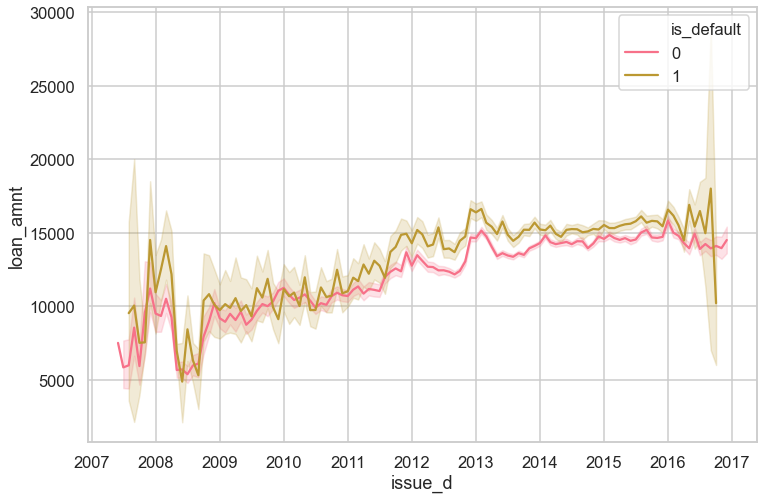

In [133]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='issue_d', y='loan_amnt',hue='is_default',  alpha=1, data=df)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396009 entries, 0 to 396008
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   loan_amnt               396009 non-null  float64       
 1   term_is_36m             396009 non-null  uint8         
 2   int_rate                396009 non-null  float64       
 3   installment             396009 non-null  float64       
 4   emp_length              396009 non-null  int32         
 5   annual_inc              396009 non-null  float64       
 6   issue_d                 396009 non-null  datetime64[ns]
 7   is_default              396009 non-null  int32         
 8   dti                     396009 non-null  float64       
 9   earliest_cr_line        396009 non-null  datetime64[ns]
 10  open_acc                396009 non-null  float64       
 11  pub_rec                 396009 non-null  float64       
 12  revol_bal               396009

In [193]:
# Correlation 
df.corr()['is_default'].sort_values(ascending=False).drop('is_default')

grade_encoder             0.257888
int_rate                  0.247764
dti                       0.132158
verification_encoder      0.085626
revol_util                0.082250
home_ownership_encoder    0.068540
loan_amnt                 0.059850
purpose_encoder           0.059388
installment               0.041100
open_acc                  0.027999
pub_rec                   0.019929
application_encoder       0.012268
pub_rec_bankruptcies      0.009412
list_status_w            -0.009486
revol_bal                -0.010837
total_acc                -0.017908
emp_length               -0.027303
mort_acc                 -0.057770
annual_inc               -0.066797
term_is_36m              -0.173234
Name: is_default, dtype: float64

In [136]:
vio = df.drop(['issue_d', 'earliest_cr_line'], axis=1)

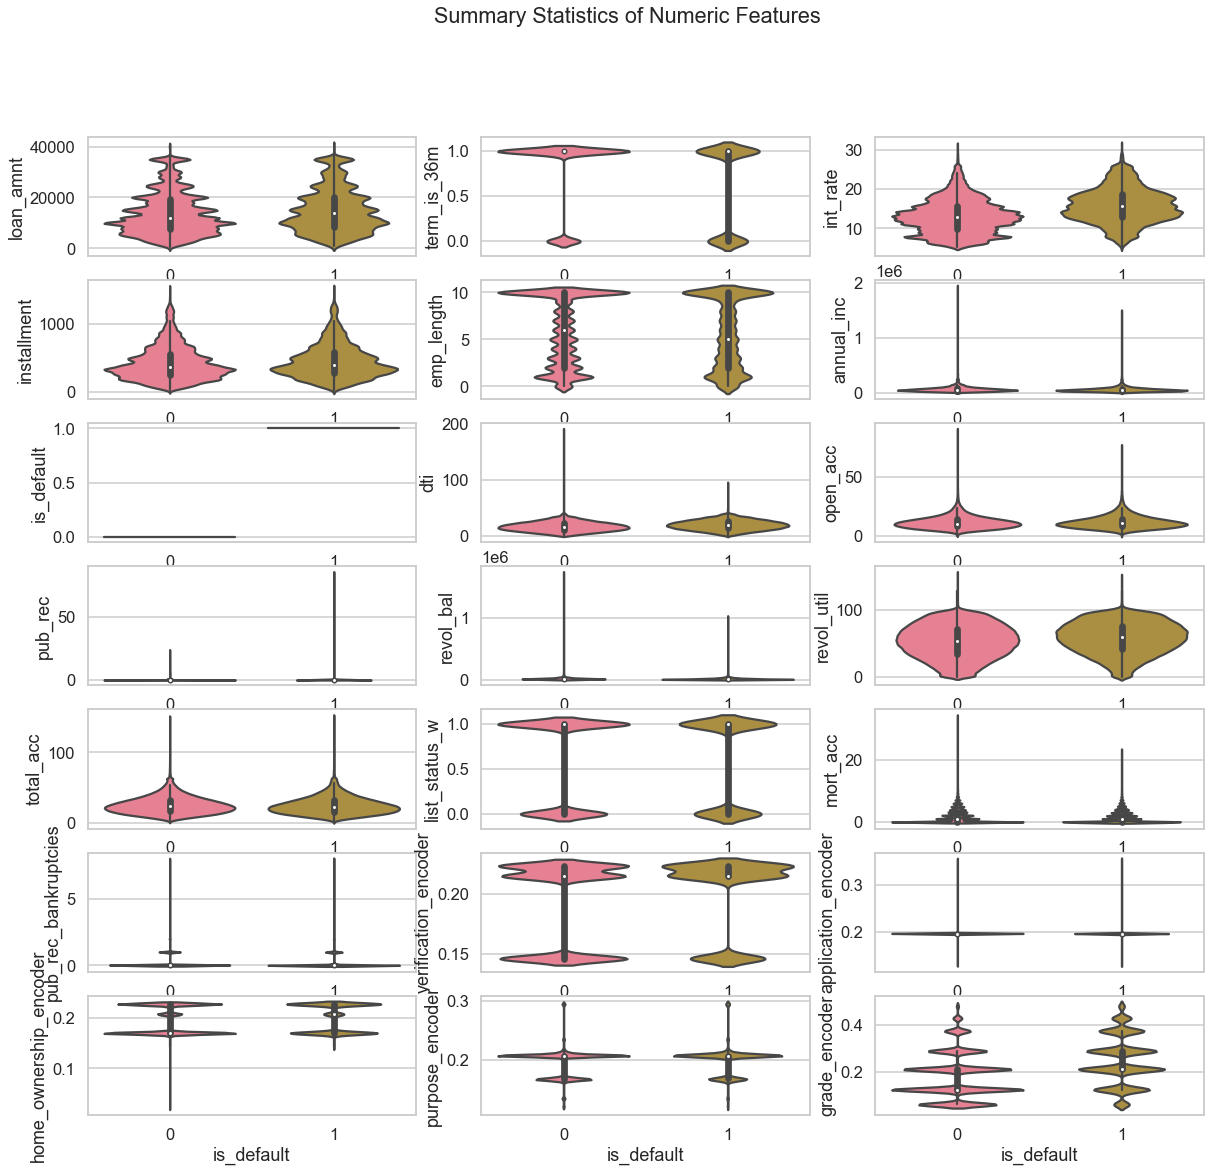

In [137]:
plt.figure(figsize=(20,18))
for i, c in enumerate(vio):
    plt.subplot(7,3, i+1)
    sns.violinplot(x='is_default', y=c, data=vio)

plt.suptitle('Summary Statistics of Numeric Features')    
plt.show()

# 4. Modelling

In [138]:
loan_df = df.copy()
loan_df.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)
loan_df.to_csv('loan_df.csv')

In [139]:
# Seperate numeric va categorical variables
loan_df1 = loan_df.copy()
loan_df1.drop('is_default', axis=1, inplace=True)
numeric = loan_df1.columns.difference(['term_is_36m', 'emp_length', 'list_status_w', 'verification_encoder', 
                                      'application_encoder', 'home_ownership_encoder', 'purpose_encoder', 'grade_encoder'])
category = loan_df1.columns.difference(numeric)

In [150]:
print(numeric)

Index(['annual_inc', 'dti', 'installment', 'int_rate', 'loan_amnt', 'mort_acc',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc'],
      dtype='object')


In [151]:
print(category)

Index(['application_encoder', 'emp_length', 'grade_encoder',
       'home_ownership_encoder', 'list_status_w', 'purpose_encoder',
       'term_is_36m', 'verification_encoder'],
      dtype='object')


In [152]:
# Instantiate X, y 
X = loan_df.drop('is_default', axis=1) 
y = loan_df['is_default']
print(X.shape, y.shape)

(396009, 20) (396009,)


,loan_amnt,term_is_36m,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,list_status_w,mort_acc,pub_rec_bankruptcies,verification_encoder,application_encoder,home_ownership_encoder,purpose_encoder,grade_encoder
0,10000.0,1,11.44,329.48,10,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0,0.0,0.0,0.146363,0.196095,0.226630,0.189233,0.125729
1,8000.0,1,11.99,265.68,4,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,1,3.0,0.0,0.146363,0.196095,0.169569,0.207419,0.125729
2,15600.0,1,10.49,506.97,1,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,1,0.0,0.0,0.214753,0.196095,0.226630,0.167120,0.125729
3,7200.0,1,6.49,220.65,6,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,1,0.0,0.0,0.146363,0.196095,0.226630,0.167120,0.062885
4,24375.0,0,17.27,609.33,9,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1,1.0,0.0,0.223222,0.196095,0.169569,0.167120,0.211823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396004,10000.0,0,10.99,217.38,2,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0,0.0,0.0,0.214753,0.196095,0.226630,0.207419,0.125729
396005,21000.0,1,12.29,700.42,5,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1,1.0,0.0,0.214753,0.196095,0.169569,0.207419,0.211823
396006,5000.0,1,9.99,161.32,10,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,1,0.0,0.0,0.223222,0.196095,0.226630,0.207419,0.125729
396007,21000.0,0,15.31,503.02,10,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,1,5.0,0.0,0.223222,0.196095,0.169569,0.207419,0.211823


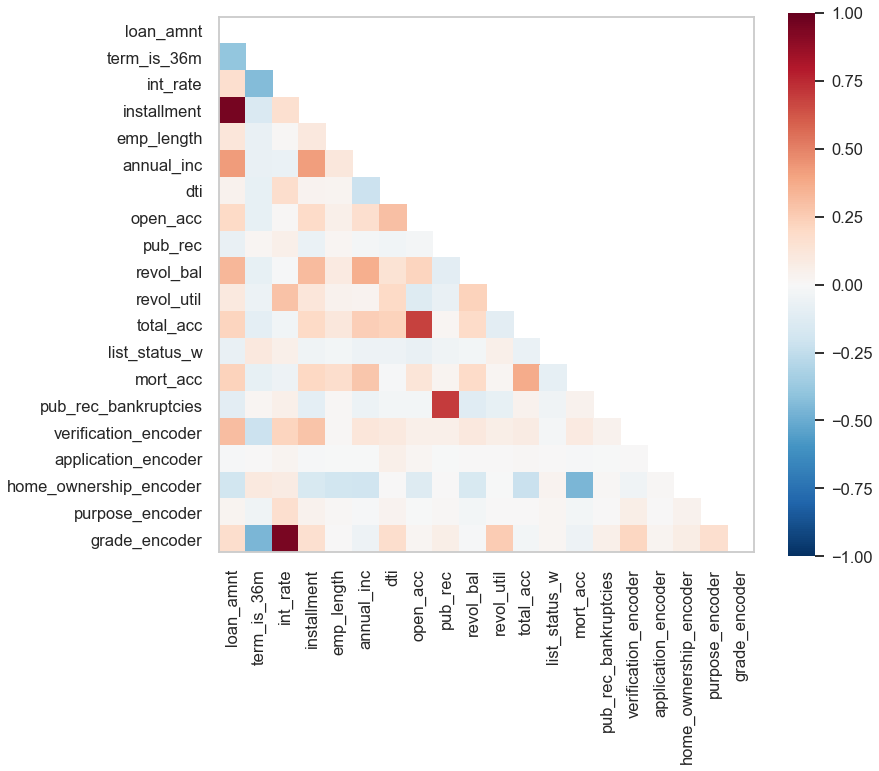

In [162]:
# Features correlation
from yellowbrick.features import Rank2D, Rank1D
plt.figure(figsize=(12,10))
rank = Rank2D(algorithm='pearson')
rank.fit(X, y)
rank.transform(X)

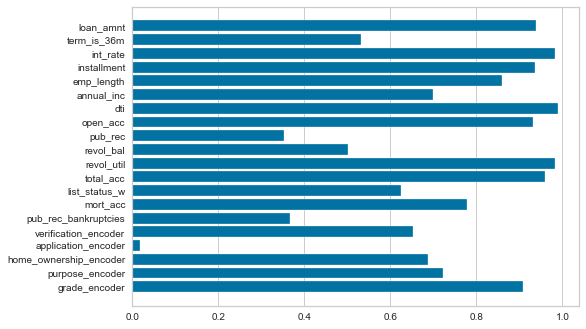

In [156]:
# Features importances
rank1 = Rank1D()
rank1.fit(X,y)
rank1.transform(X)
rank.show()

### Data Standarisation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = StandardScaler()
cols = X_train.columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled = scaler.fit_transform(X_train_scaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols)
X_test_scaled = scaler.transform(X_test_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols)

__AVAILABLE:__<br>
X_train, X_test, y_train, y_test<br>
X_train_scaled, X_test_scaled, y_train, y_test

### Oversampling (SMOTENC, ADASYN) / Undersampling

In [ ]:
from yellowbrick.target import ClassBalance

def classbalance(y):
    alass = ClassBalance(labels=['Not Default', 'Default'])
    alass.fit(y)
    alass.show()

classbalance(y)

In [ ]:
from collections import Counter

def counter(y): 
    counter = Counter(y)
    for i, v in counter.items():
        per = 100* v / len(y)
        print(f'Value:{i}, Count:{v}, Percentage:{per}')
        
counter(y)

In [ ]:
# Get indices of category columns
[X_train.columns.get_loc(c) for c in category]

In [ ]:
#Sampler Class
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, RandomOverSampler

class Sampler(object):
    sampler = {'SMOTE': SMOTE(random_state=42),
               'SMOTENC': SMOTENC(random_state=42, 
                                  categorical_features=[X_train.columns.get_loc(c) for c in category]), 
               'ADASYN': ADASYN(random_state=42), 
               'RandomOverSampler': RandomOverSampler(random_state=42)}
    def __init__(self, name):
        self.sm = self.sampler[name]
    
    def sampling(self, X_train, y_train):
        X_sampled, y_sampled = self.sm.fit_resample(X_train, y_train)        
        return X_sampled, y_sampled

In [ ]:
#Numeric + Categorical Features scaled/unscaled
sampler = Sampler('SMOTENC')
X_train_SMOTENC, y_train_SMOTENC = sampler.sampling(X_train, y_train)
X_train_SMOTENC_scaled, y_train_SMOTENC_scaled = sampler.sampling(X_train_scaled, y_train)

In [ ]:
#Numeric features Features scaled/unscaled
sampler_ada = Sampler('ADASYN')
X_train_ADASYN, y_train_ADASYN = sampler_ada.sampling(X_train[numeric], y_train)
X_train_ADASYN_scaled, y_train_ADASYN_scaled = sampler_ada.sampling(X_train_scaled[numeric], y_train)

In [ ]:
#Numeric + Categorical Features of ADASYN
#sampler_ada = Sampler('ADASYN')
#X_train_ADASYN_all, y_train_ADASYN_all = sampler_ada.sampling(X_train, y_train)
#X_train_scaled_ADASYN_all, y_train_scaled_ADASYN_all = sampler_ada.sampling(X_train_scaled, y_train)

### Classifier class  definition

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


class Classifier(object):
    
    classifier = {'LogisticRegression': LogisticRegression(),
                  'AdaBoost': AdaBoostClassifier(),
                  'RandomForest': RandomForestClassifier(),
                  'Neural': MLPClassifier(),
                  'XGBoost': XGBClassifier()}
    
    clf_init_param = {'LogisticRegression': {'random_state':42},
                      
                      'AdaBoost': {'random_state':42}, 
                      
                      'RandomForest': {'random_state':42}, 
                      
                      'Neural': {'random_state':42}, 
                      
                      'XGBoost': {'objective': 'binary:logistic',
                                  'max_delta_step':1,
                                  'min_child_weight':1,
                                  'random_state':42}
                     }
    def __init__(self, name):
        self.name = name
        self.model = self.classifier[name].set_params(**self.clf_init_param[name])

### Plot class definition

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class Plot:
    
    def __init__(self):
        pass
    
    def confusion_matrix(y_test, y_pred):
                        
        print(f'Classification Report: \n {classification_report(y_test, y_pred, target_names=["Paid", "Default"])}')
        print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
        
        cm = confusion_matrix(y_test, y_pred)        
        print(f'\nConfusion matrix:\n{cm}')

        
        labels = ['Paid', 'Default']
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, cmap=plt.cm.Blues)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.show()

### Model class definition

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

class Model(object):
    
    def __init__(self):
        pass
    
    def start(name, X_train, y_train, X_test):
        clf = Classifier(name)
        pipe = Pipeline([('clfr', clf.model)])
        pipe.fit(X_train, y_train)
        pipe_preds = pipe.predict(X_test)
        return pipe_preds   

### 1st Model: SMOTENC + AdaBoost (Unscaled)

In [ ]:
name = 'AdaBoost'
ada_preds = Model.start(name, X_train_SMOTENC, y_train_SMOTENC, X_test)
Plot.confusion_matrix(y_test, ada_preds)

### 2nd Model: SMOTENC + AdaBoost (Scaled)

In [ ]:
name = 'AdaBoost'
ada_preds = Model.start(name, X_train_SMOTENC_scaled, y_train_SMOTENC_scaled, X_test)
Plot.confusion_matrix(y_test, ada_preds)

### 3rd Model: ADASYN + AdaBoost(Unscaled)

In [ ]:
name = 'AdaBoost'
ada_preds = Model.start(name, X_train_ADASYN, y_train_ADASYN, X_test[numeric])
Plot.confusion_matrix(y_test, ada_preds)

### 4th Model: ADASYN + AdaBoost(Scaled)

In [ ]:
name = 'AdaBoost'
ada_preds = Model.start(name, X_train_ADASYN_scaled, y_train_ADASYN_scaled, X_test[numeric])
Plot.confusion_matrix(y_test, ada_preds)

### 5th Model: ADASYN + LogisticRegression(Unscaled)<br>  ====WINNER====

In [ ]:
name = 'LogisticRegression'
log_preds = Model.start(name, X_train_ADASYN, y_train_ADASYN, X_test[numeric])
Plot.confusion_matrix(y_test, log_preds)

### 6th Model: ADASYN + LogisticRegression(Scaled)

In [ ]:
name = 'LogisticRegression'
log_preds = Model.start(name, X_train_ADASYN_scaled, y_train_ADASYN_scaled, X_test[numeric])
Plot.confusion_matrix(y_test, log_preds)

### 7th Model: ADASYN + XGBoost(Unscaled)

In [ ]:
name = 'XGBoost'
xg_preds = Model.start(name, X_train_ADASYN, y_train_ADASYN, X_test[numeric])
Plot.confusion_matrix(y_test, xg_preds)

### 8th Model: ADASYN + XGBoost(Scaled)

In [ ]:
name = 'XGBoost'
xg_preds = Model.start(name, X_train_ADASYN_scaled, y_train_ADASYN_scaled, X_test[numeric])
Plot.confusion_matrix(y_test, xg_preds)

### 9th Model: SMOTENC + XGBoost(Unscaled)

In [ ]:
name = 'XGBoost'
xg_preds = Model.start(name, X_train_SMOTENC, y_train_SMOTENC, X_test)
Plot.confusion_matrix(y_test, xg_preds)

### 10th Model: SMOTENC + XGBoost(Scaled)

In [ ]:
name = 'XGBoost'
xg_preds = Model.start(name, X_train_SMOTENC_scaled, y_train_SMOTENC_scaled, X_test)
Plot.confusion_matrix(y_test, xg_preds)